LeetCode | Top 100 | 15. 3Sum

# Question

[15. 3Sum](https://leetcode.com/problems/3sum/)

Given an integer array nums, return all the triplets `[nums[i], nums[j], nums[k]]` such that `i != j`, `i != k`, and `j != k`, and `nums[i] + nums[j] + nums[k] == 0`.

Notice that the solution set must not contain duplicate triplets.

 

**Example 1**:
```
Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
```
**Example 2**:
```
Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.
```
**Example 3**:
```
Input: nums = [0,0,0]
Output: [[0,0,0]]
Explanation: The only possible triplet sums up to 0.
```

**Constraints**:
- `3 <= nums.length <= 3000`
- `-10^5 <= nums[i] <= 10^5`

# Knowledge 

## Two Pointer

### Concept

[Two Pointers Approach — Python Code](https://towardsdatascience.com/two-pointer-approach-python-code-f3986b602640)

`Two pointer` algorithm is one of the most commonly asked questions in any programming interview. This approach optimizes the runtime by utilizing some order (not necessarily sorting) of the data. This approach is generally used to search pairs in a sorted array. This approach works in constant space.

**Steps in two pointer approach**


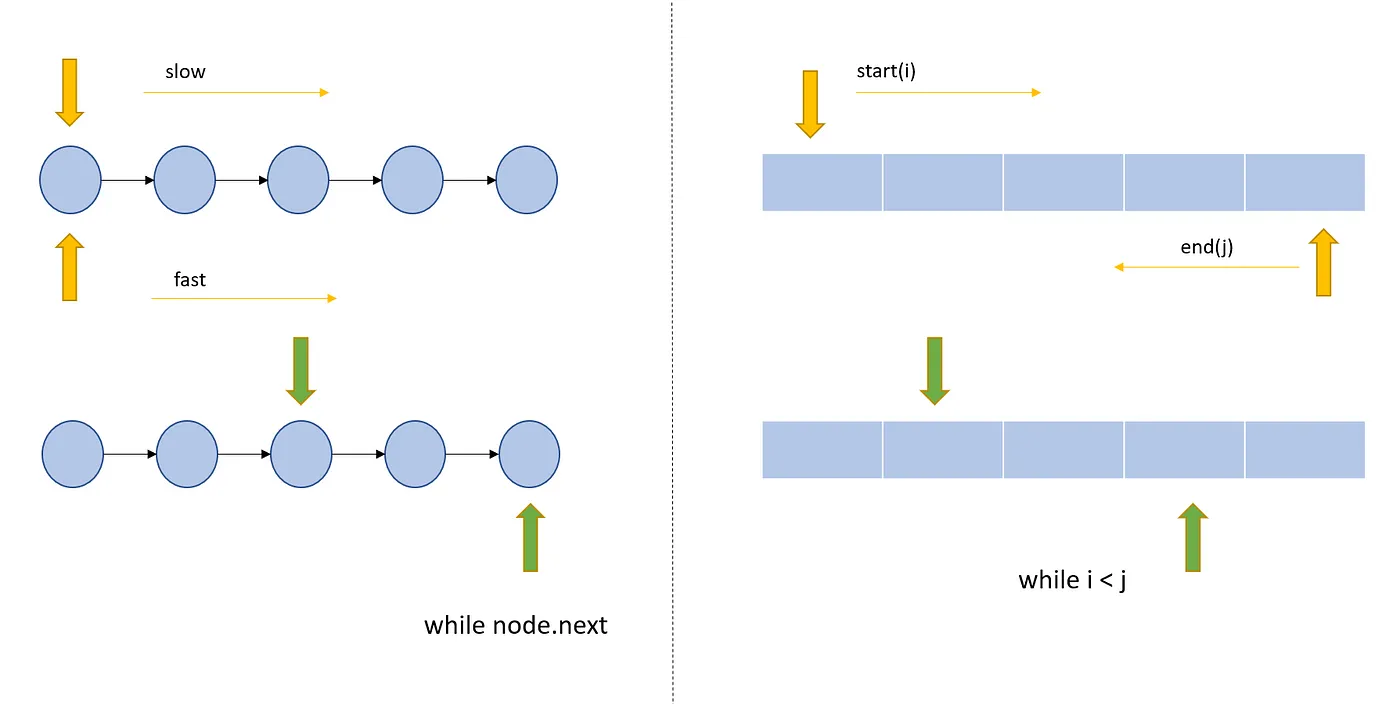

Two-pointer approach has 3 main steps:

- `Pointer Initialization` — Starting points. Pointers can be at any place depending upon what we are trying to achieve. In the left part of the pic, we have both pointers starting at the same position i.e. start of the linked list. In the right part of the pic, we have pointers at extreme ends one at starting index and another one at the last index.

- `Pointer movement` — This will decide how we converge toward the solution. Pointers can move in the same direction (left in the above pic) or they can move in the opposite direction (right in the above pic). Also in the left part of the pic, we have different increments for the pointers(top (slow) with 1 unit and bottom (fast) with 2 units).

- `Stop condition` — This decides when do we stop. In the left part, we continue till we reach a node whose next element is None. In the right one, we continue till our start is less than the end (`i <j`).

## itertools.combinations

### Concept

[itertools.combinations(iterable, r)](https://docs.python.org/3/library/itertools.html#itertools.combinations)

`itertools.combinations(iterable, r)`, Return `r` length subsequences of elements from the input `iterable`.

The combination tuples are emitted in lexicographic ordering according to the order of the input iterable. So, if the input iterable is sorted, the output tuples will be produced in sorted order.

Elements are treated as unique based on their position, not on their value. So if the input elements are unique, there will be **no repeated values in each combination**.

**Example**

In [97]:
from itertools import combinations

[i for i in combinations('ABCD', 3)]

[('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]

# Solutions

**1.** `Two Pointers`

reference: [C++ - Easiest Beginner friendly Sol || Set + Two Pointer Approach || O(n^2) time and O(n) space](https://leetcode.com/problems/3sum/solutions/3109452/c-easiest-beginner-friendly-sol-set-two-pointer-approach-o-n-2-time-and-o-n-space/?orderBy=most_votes&languageTags=python)

- [x] 1. sort nums with ascending order;
- [x] 2. pre-judge: if the number of elements is less than 3, directly return `[]` and stop here, else, continue;
- [x] 3. if the number of elements is larger than 3:<br>
3.1 if `start` pointer is larger than `0` and `nums[s]==nums[s-1]`, move `start` to right by using `continue` to skip current loop;<br>
3.2 apply `s+1` to `l` (left index) and `len(nums)-1` to `r` (right index);<br>
while `l` is at the left of `r`, summarize `nums[s]`, `nums[l]` and `nums[r]` and check if `sum=0`: <br>
- if `sum=0`, add `[nums[s], nums[l], nums[r]]` to `output`;
- if `sum<0`, move `l` to its right, which points to a larger number;
- if `sum>0`, move `r` to its left, which points to a smaller number; 

In [98]:
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums.sort()                                             # 1
        print(f"sorted nums: {nums}")
        
        count = len(nums)                                       # 2
        if count < 3:                                           
            return []

        output = []
        for s in range(count-2):                                # 3
            if s > 0 and nums[s] == nums[s-1]:                  # 3.1                 
                continue
            l, r = s+1, count-1                                 # 3.2                                                               
            while l < r:
                sum = nums[s] + nums[l] + nums[r]               
                if sum == 0:
                    output.append([nums[s], nums[l], nums[r]])
                    l += 1
                    while nums[l] == nums[l-1] and (l < r):
                        l += 1
                    r -= 1
                    while nums[r] == nums[r+1] and (l < r):
                        r -= 1
                elif sum < 0:
                    l += 1
                else:
                    r -= 1

        return output

if __name__ == '__main__':
    nums = [-1,0,1,2,-1,-4]
    sol = Solution()
    output = sol.threeSum(nums=nums)

sorted nums: [-4, -1, -1, 0, 1, 2]


In [99]:
output

[[-1, -1, 2], [-1, 0, 1]]

**2.** `itertools.combinations`

reference: [[Python] 5 Easy Steps - Beats 97.4% - Annotated](https://leetcode.com/problems/3sum/solutions/725950/python-5-easy-steps-beats-97-4-annotated/?orderBy=most_votes&languageTags=python3)

- [x] 1. split `nums` into 3 list, `n` for negatives, `p` for positives and `z` for zeroes;<br>
shorten `n` and `p` into set `N` and `P` for `O(1)` look-up times;
- [x] 2. enumeration<br>
2.1 if there is at least 1 `0` in the list, add all cases where `-num` exists in `N` and `num` exists in `P`;<br>
2.2 if there are at least 3 `0` in the list then also include `(0, 0, 0) = 0`, and if no `n` or no `p`, directly return `(0, 0, 0)=0`;<br>
2.3 if all pairs of negatives `(-3, -1)`, check if their complement `(4)` exists in the positive number set `P`, if yes, then add `sorted(-3，-1，4)`;<br>
2.4 if all pairs of positives `(1, 1)`, check if their complement `(-2)` exists in the negative number set `N`, if yes, then add `sorted(1, 1, -2)`;<br>

In [100]:
from itertools import combinations

class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        if len(nums) < 3:
            return []
 
        r = set()                                               # 1

        n, p, z = [], [], []
        for num in nums:
            if num>0:
                p.append(num)
            elif num<0:
                n.append(num)
            else:
                z.append(num)
        print(f"1. \nn: {n}\np: {p}\nz: {z}")

        N, P = set(n), set(p)
        print(f"\nN: {N}\nP: {P}")

        if z:                                                   # 2
            for num in P:                                       # 2.1
                if -num in N:
                    r.add((-num, 0, num))
                    print(f"\n2.\n2.1 \n{(-num, 0, num)}")

            if len(z)>=3:                                       # 2.2 
                r.add((0,0,0))
                if not n or not p:
                    return [list(x) for x in r]
                print(f"\n2.2 \n{(0, 0, 0)}")

        for x, y in combinations(n, 2):                         # 2.3 
            if -(x+y) in P:
                r.add(tuple(sorted([x, y, -(x+y)])))
                print(f"\n2.3 \n{(x, y, -(x+y))}")

        for x, y in combinations(p, 2):                         # 2.4
            if -(x+y) in N:
                r.add(tuple(sorted([x, y, -(x+y)])))
                print(f"\n2.4 \n{(x, y, -(x+y))}")

        return [list(x) for x in r]

if __name__ == '__main__':
    nums = [-1,0,1,2,-1,-4]
    sol = Solution()
    output = sol.threeSum(nums=nums)

1. 
n: [-1, -1, -4]
p: [1, 2]
z: [0]

N: {-4, -1}
P: {1, 2}

2.
2.1 
(-1, 0, 1)

2.3 
(-1, -1, 2)


In [101]:
output

[[-1, 0, 1], [-1, -1, 2]]